In [5]:
import cv2
from matplotlib import pyplot as plt

In [6]:
image_file = "page_01.jpg"
img = cv2.imread(image_file)

In [3]:
# cv2.imshow("original image",img)
# cv2.waitKey(0)

In [10]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [14]:
# display(image_file)

## 01: Invert image
The dark sections become light and light becomes the opposite.

In [15]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

## 02: Rescaling


## 02: Binarize
Convert an image into black and white.
Firstly grayscale, afterwards black-white.

In [17]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

In [21]:
#display("temp/gray.jpg")

In [39]:
tresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

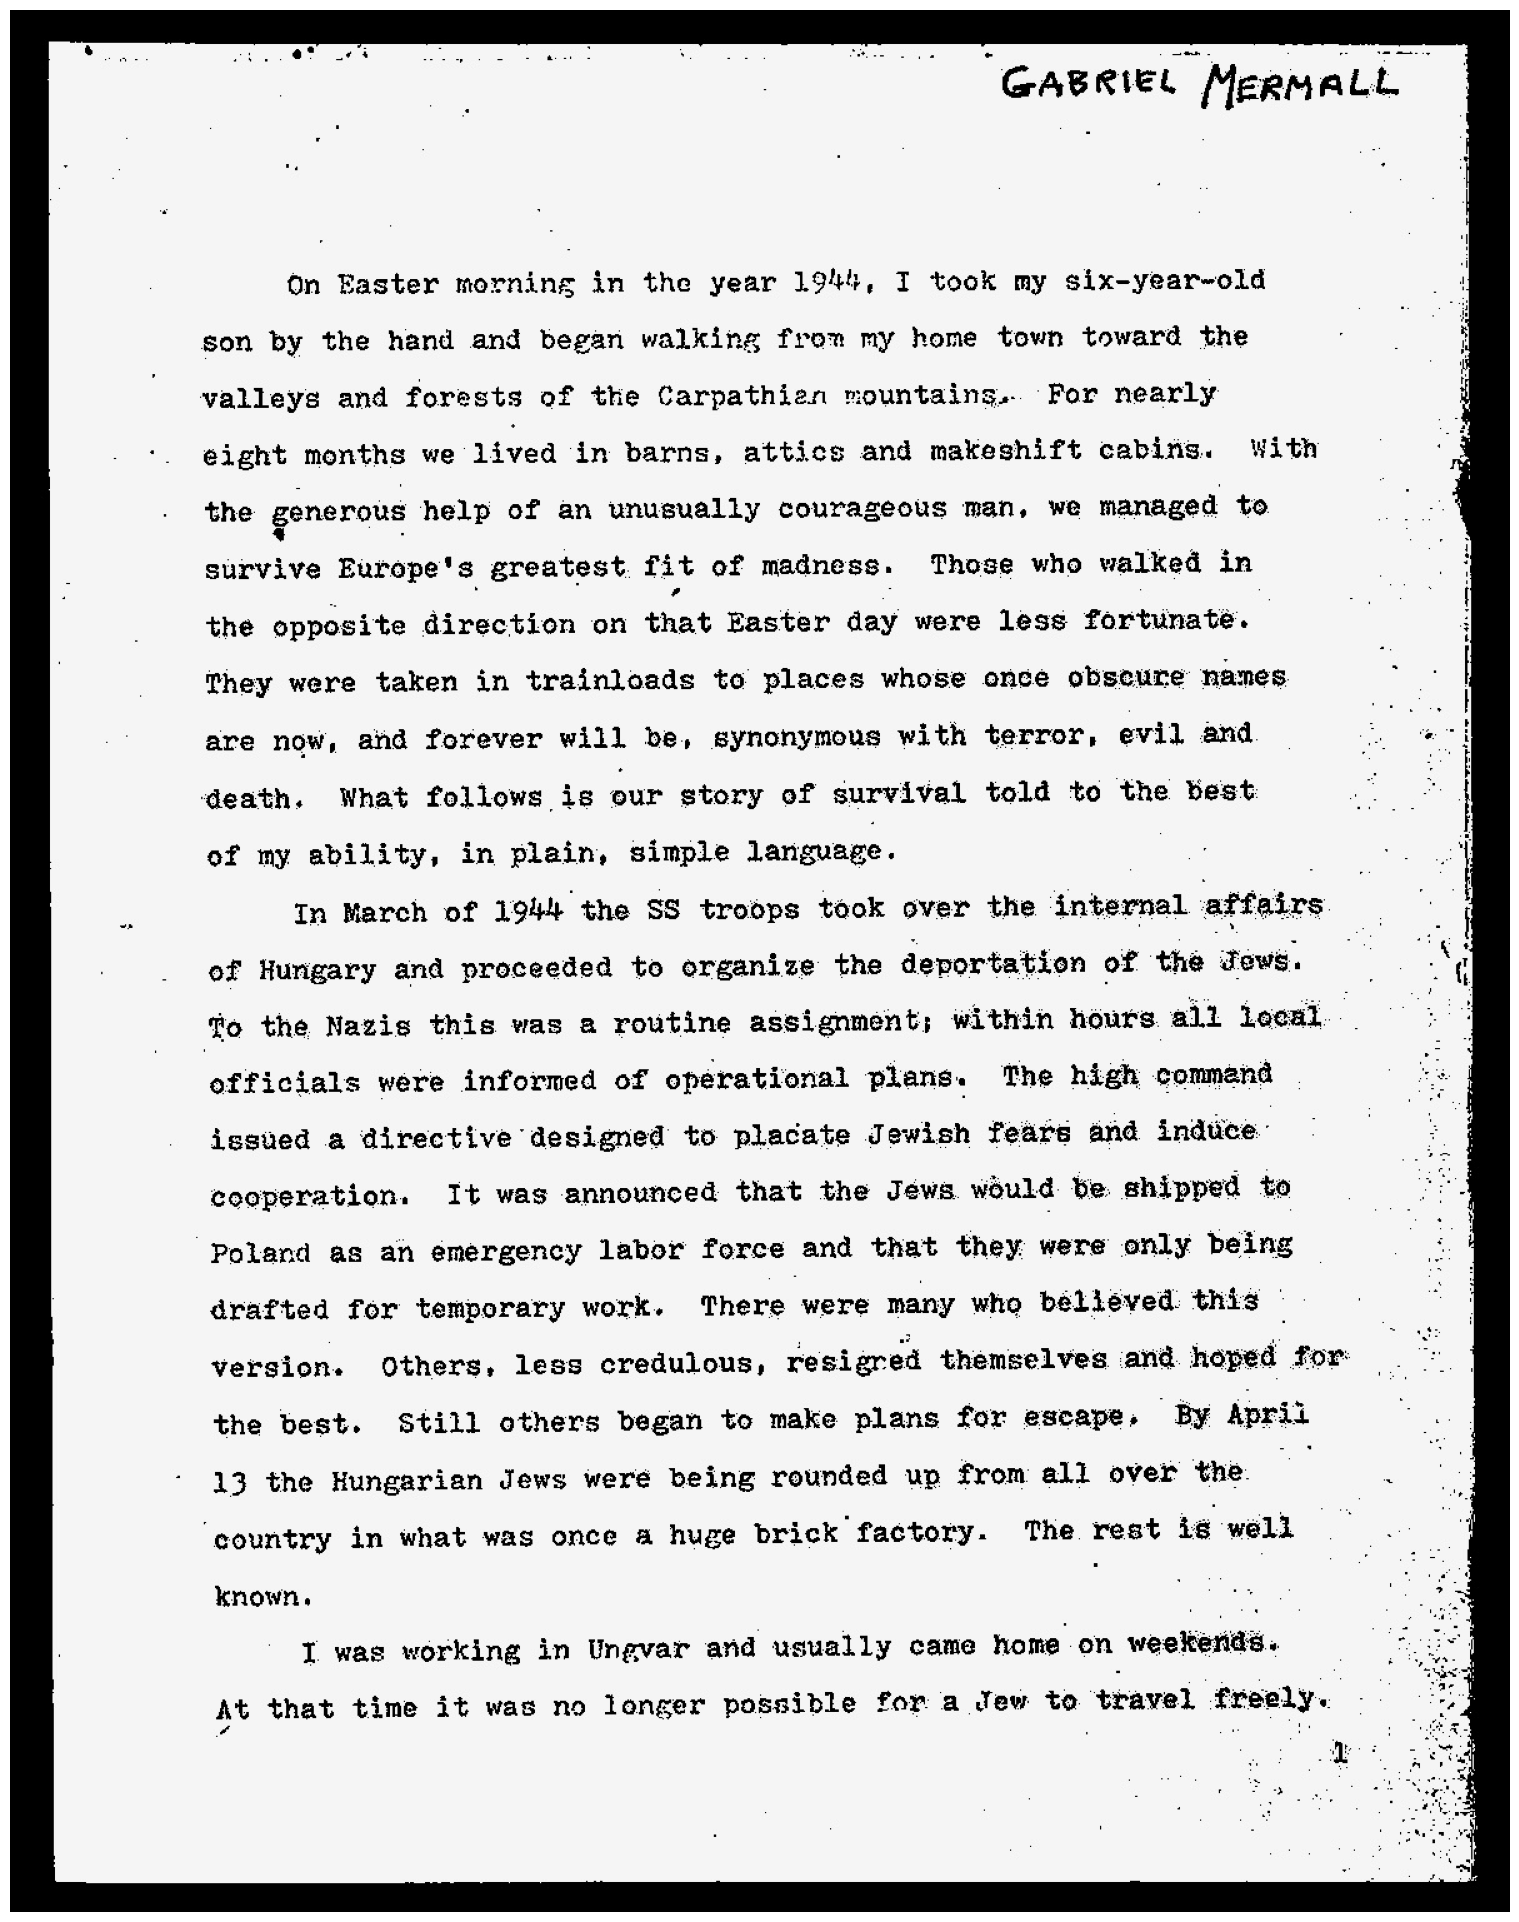

In [40]:
display("temp/bw_image.jpg")

## 04: Noise removal

In [41]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return image

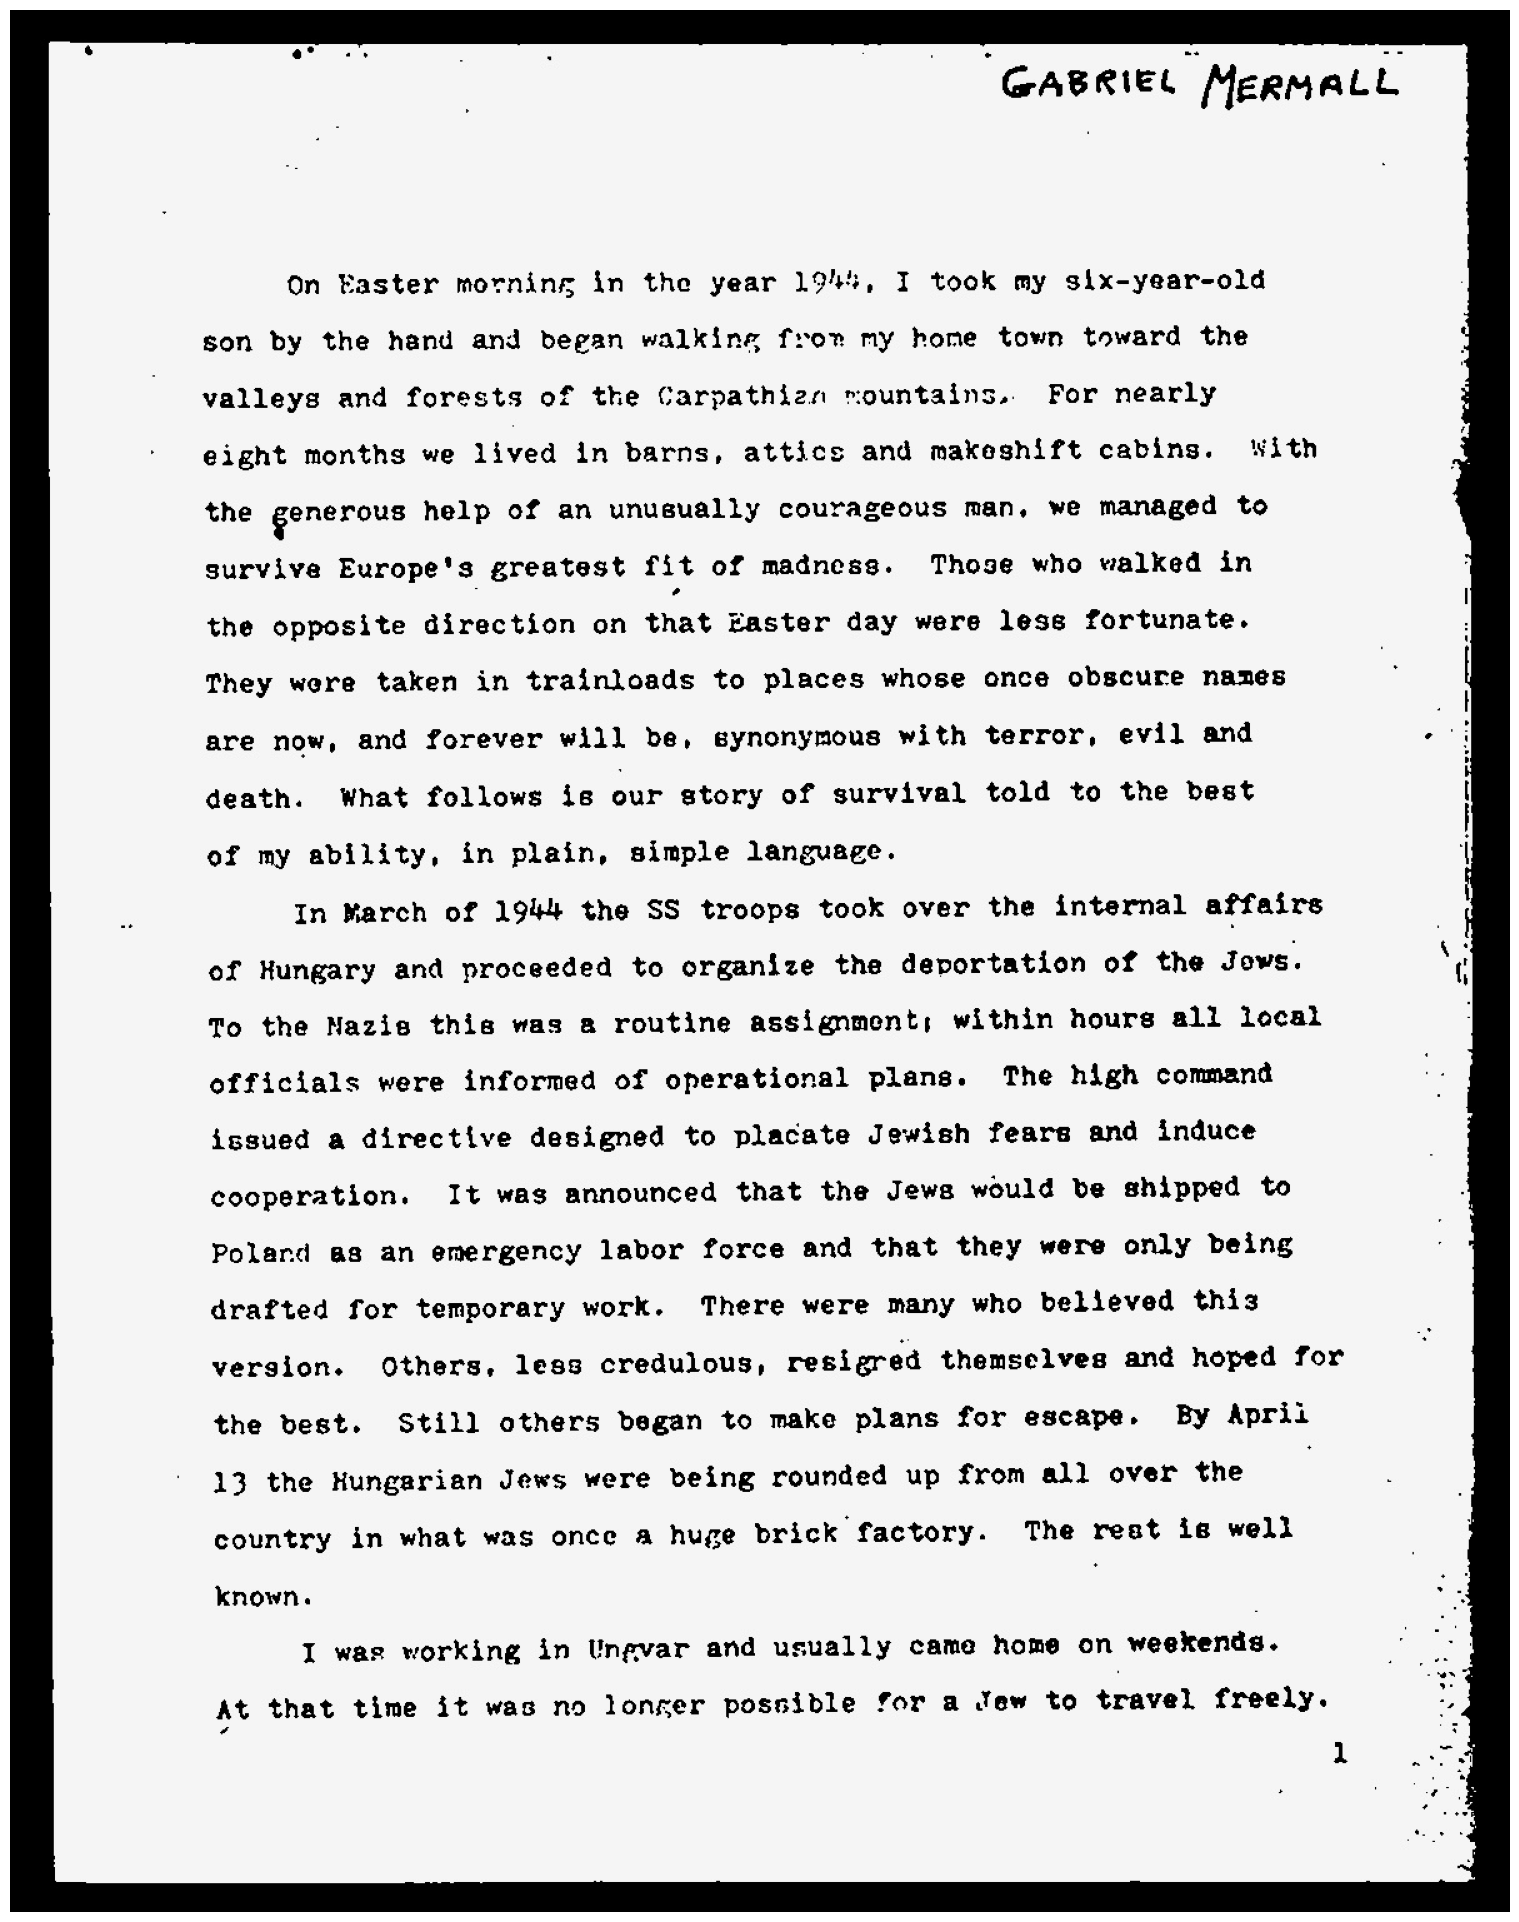

In [42]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)
display("temp/no_noise.jpg")